<a href="https://colab.research.google.com/github/Yashwanthv21/ML-AI/blob/master/Vgg19_Vgg16_Inceptionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Kaggle and Other Libs

In [0]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 2.3MB/s 
    100% |████████████████████████████████| 245kB 6.7MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [0]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.3MB/s 
  Running setup.py bdist_wheel for PyDrive ... - done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


### Using a helper function, To import a custom python file in Google Colab

In [0]:
fileId = drive.CreateFile({'id': '18ticEcFNQ_0hUF3_CccRzikqI09SL8oH'}) #DRIVE_FILE_ID https://drive.google.com/open?id=18ticEcFNQ_0hUF3_CccRzikqI09SL8oH
print (fileId['title'])  # folder_data.zip
fileId.GetContentFile('data_helper.py')  # Save Drive file as a local file

data_helper.py


### Create a API Token in Kaggle and use it to download the Data for this project
Replace the username and key with yours, the key there will not work

In [0]:
#Create API Token and export the details
api_token = {"username":"yash21","key":"5c3e31860czvzrew366c1165da1675ce"}

import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
!kaggle config path -p /content

usage: kaggle config [-h] {view,set,unset} ...
kaggle config: error: argument command: invalid choice: 'path' (choose from 'view', 'set', 'unset')


### Download the Dataset 

In [0]:
!kaggle competitions download -c planet-understanding-the-amazon-from-space

train-jpg.tar.7z: Skipping, found more recently modified local copy (use --force to force download)
test-jpg.tar.7z: Skipping, found more recently modified local copy (use --force to force download)
train-tif-v2.tar.7z: Skipping, found more recently modified local copy (use --force to force download)
test-tif-v2.tar.7z: Skipping, found more recently modified local copy (use --force to force download)
 98% 297M/304M [00:05<00:00, 54.5MB/s]
100% 304M/304M [00:05<00:00, 55.5MB/s]
  0% 0.00/1.52M [00:00<?, ?B/s]
100% 1.52M/1.52M [00:00<00:00, 126MB/s]
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 96.1MB/s]
  0% 0.00/154k [00:00<?, ?B/s]
100% 154k/154k [00:00<00:00, 53.1MB/s]
  0% 0.00/159k [00:00<?, ?B/s]
100% 159k/159k [00:00<00:00, 72.4MB/s]
  0% 0.00/110k [00:00<?, ?B/s]
100% 110k/110k [00:00<00:00, 57.8MB/s]


In [0]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import seaborn as sns

### List files and Unzip the data files

In [3]:
!ls

sample_data


In [16]:
!unzip train_v2.csv.zip
!7z x train-jpg.tar.7z
!tar -xvf train-jpg.tar
!7z x test-jpg.tar.7z
!tar -xvf test-jpg.tar
!7z x test-jpg-additional.tar.7z	
!tar -xvf test-jpg-additional.tar
!rm test-jpg-additional.tar test-jpg-additional.tar.7z test-jpg.tar test-jpg.tar.7z train-jpg.tar.7z train_v2.csv.zip

Archive:  train_v2.csv.zip
  inflating: train_v2.csv            
   creating: __MACOSX/
  inflating: __MACOSX/._train_v2.csv  

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 629296207 bytes (601 MiB)

Extracting archive: train-jpg.tar.7z
--
Path = train-jpg.tar.7z
Type = 7z
Physical Size = 629296207
Headers Size = 98
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      0% - train-jpg.tar                      1% - train-jpg.tar                      2% - train-jpg.tar                      3% - train-jpg.tar                      4% - train-jpg.tar                    

In [33]:

!ls

adc.json			 test-jpg-additional
data_helper.py			 test-tif-v2.tar.7z
Kaggle-planet-test-tif.torrent	 test_v2_file_mapping.csv.zip
Kaggle-planet-train-tif.torrent  train-jpg
__MACOSX			 train-jpg.tar
__pycache__			 train-tif-v2.tar.7z
sample_data			 train_v2.csv
sample_submission_v2.csv.zip	 weightsvgg19.best.hdf5
test-jpg


## Load the Data Labels

In [34]:
labels_df = pd.read_csv('train_v2.csv')
labels_df.head()

image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road

In [35]:
labels_df.shape

(40479, 2)

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### View a Sample Image from the dataset

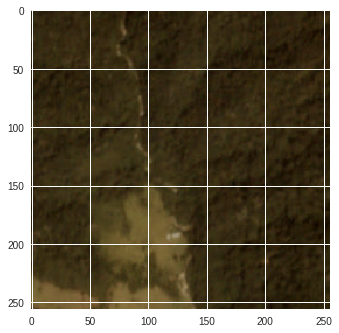

In [0]:
img=mpimg.imread('train-jpg/train_4.jpg')
imgplot = plt.imshow(img)
plt.show()

In [36]:
from itertools import chain
labels_list = list(chain.from_iterable([tags.split(" ") for tags in labels_df['tags'].values]))
labels_set = set(labels_list)
print("There is {} unique labels including {}".format(len(labels_set), labels_set))

There is 17 unique labels including {'selective_logging', 'blow_down', 'road', 'partly_cloudy', 'artisinal_mine', 'agriculture', 'water', 'cultivation', 'habitation', 'conventional_mine', 'clear', 'haze', 'slash_burn', 'blooming', 'primary', 'bare_ground', 'cloudy'}


### Histogram of label Instances

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


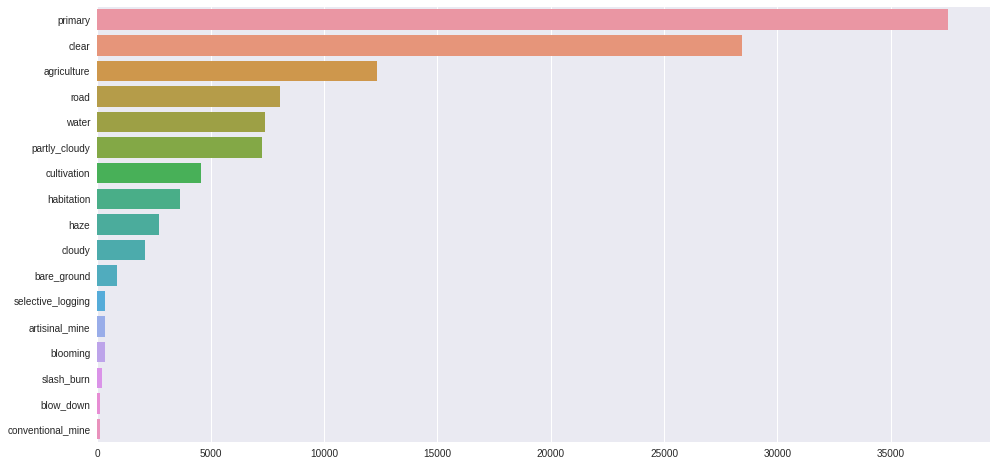

In [0]:
# Histogram of label instances
labels_s = pd.Series(labels_list).value_counts() # To sort them by count
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=labels_s, y=labels_s.index, orient='h')

## View one Image per class

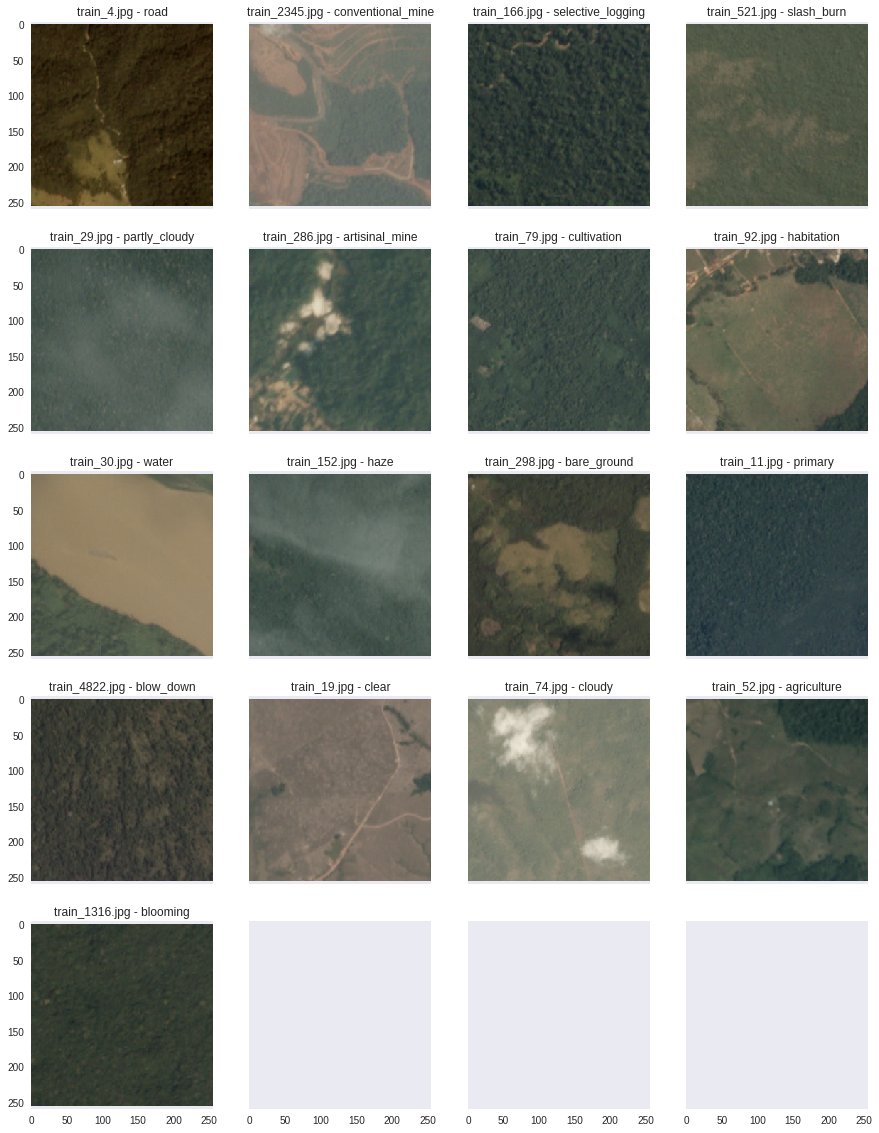

In [0]:
images_title = [labels_df[labels_df['tags'].str.contains(label)].iloc[i]['image_name'] + '.jpg' 
                for i, label in enumerate(labels_set)]

plt.rc('axes', grid=False)
_, axs = plt.subplots(5, 4, sharex='col', sharey='row', figsize=(15, 20))
axs = axs.ravel()

for i, (image_name, label) in enumerate(zip(images_title, labels_set)):
    img = mpimg.imread('train-jpg/' + image_name)
    axs[i].imshow(img)
    axs[i].set_title('{} - {}'.format(image_name, label))

In [4]:
from data_helper import AmazonPreprocessor

Using TensorFlow backend.


In [0]:
img_resize = (128, 128) # The resize size of each image ex: (64, 64) or None to use the default image size
validation_split_size = 0.2
train_jpeg_dir = 'train-jpg'
train_csv_file = 'train_v2.csv'
test_jpeg_dir = 'test-jpg'
test_jpeg_additional = 'test-jpg-additional'

## Some Preprocessing in the helper.py

In [6]:

preprocessor = AmazonPreprocessor(train_jpeg_dir, train_csv_file, test_jpeg_dir, test_jpeg_additional, 
                                  img_resize, validation_split_size)
preprocessor.init()

100%|██████████| 8096/8096 [00:00<00:00, 214053.92it/s]


Transforming val dataset...


100%|██████████| 8096/8096 [00:12<00:00, 623.51it/s]


Done. Size consumed by validation matrices 1518.0 mb


In [7]:
print("X_train/y_train length: {}/{}".format(len(preprocessor.X_train), len(preprocessor.y_train)))
print("X_val/y_val length: {}/{}".format(len(preprocessor.X_val), len(preprocessor.y_val)))
print("X_test/X_test_filename length: {}/{}".format(len(preprocessor.X_test), len(preprocessor.X_test_filename)))
preprocessor.y_map

X_train/y_train length: 32383/32383
X_val/y_val length: 8096/8096
X_test/X_test_filename length: 61191/61191


{0: 'agriculture',
 1: 'artisinal_mine',
 2: 'bare_ground',
 3: 'blooming',
 4: 'blow_down',
 5: 'clear',
 6: 'cloudy',
 7: 'conventional_mine',
 8: 'cultivation',
 9: 'habitation',
 10: 'haze',
 11: 'partly_cloudy',
 12: 'primary',
 13: 'road',
 14: 'selective_logging',
 15: 'slash_burn',
 16: 'water'}

## Import the requirements for running Models

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
import keras
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Input, Flatten, Dropout
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,LearningRateScheduler, TensorBoard, EarlyStopping, History


## Trnasfer Learning on VGG19

In [0]:
img_dim=(128, 128, 3)
input_tensor = Input(shape=img_dim)
base_model = VGG19(include_top=False,
                       weights='imagenet',
                       input_shape=img_dim)
    
bn = BatchNormalization()(input_tensor)
x = base_model(bn)
x = Flatten()(x)
output = Dense(17, activation='sigmoid')(x)
model = Model(input_tensor, output)

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 17)                139281    
Total params: 20,163,677
Trainable params: 20,163,671
Non-trainable params: 6
_________________________________________________________________


In [16]:
history = History()
callbacks = [history, 
             EarlyStopping(monitor='val_loss', patience=3, verbose=1, min_delta=1e-4),
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, cooldown=0, min_lr=1e-7, verbose=1),
             ModelCheckpoint(filepath='weightsvgg19.best.hdf5', verbose=1, save_best_only=True, 
                             save_weights_only=True, mode='auto')]

X_train, y_train = preprocessor.X_train, preprocessor.y_train
X_val, y_val = preprocessor.X_val, preprocessor.y_val

batch_size = 128
train_generator = preprocessor.get_train_generator(batch_size)
steps = len(X_train) / batch_size

model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit_generator(train_generator, steps, epochs=25, verbose=1, 
                    validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/25
253/252 [==============================] - 358s 1s/step - loss: 0.1372 - acc: 0.9468 - val_loss: 0.1115 - val_acc: 0.9580

Epoch 00001: val_loss improved from inf to 0.11146, saving model to weightsvgg19.best.hdf5
Epoch 2/25
253/252 [==============================] - 334s 1s/step - loss: 0.1025 - acc: 0.9608 - val_loss: 0.1030 - val_acc: 0.9604

Epoch 00002: val_loss improved from 0.11146 to 0.10296, saving model to weightsvgg19.best.hdf5
Epoch 3/25
253/252 [==============================] - 334s 1s/step - loss: 0.0956 - acc: 0.9634 - val_loss: 0.1021 - val_acc: 0.9618

Epoch 00003: val_loss improved from 0.10296 to 0.10209, saving model to weightsvgg19.best.hdf5
Epoch 4/25
253/252 [==============================] - 334s 1s/step - loss: 0.0917 - acc: 0.9648 - val_loss: 0.0977 - val_acc: 0.9625

Epoch 00004: val_loss improved from 0.10209 to 0.09766, saving model to weightsvgg19.best.hdf5
Epoch 5/25
253/252 [==============================] - 333s 1s/step - loss: 0.0895 - acc:

In [0]:
def saveAndUpload(model_name):
# Install the PyDrive wrapper & import libraries.
  # This only needs to be done once in a notebook.
  !pip install -U -q PyDrive
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials

  # Authenticate and create the PyDrive client.
  # This only needs to be done once in a notebook.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  # Create & upload a file.
  uploaded = drive.CreateFile({'title': model_name})
  uploaded.SetContentFile(model_name)
  uploaded.Upload()
  print('Uploaded file with https://drive.google.com/open?id={}'.format(uploaded.get('id')))

In [46]:
saveAndUpload('weightsvgg19.best.hdf5')

Uploaded file with https://drive.google.com/open?id=1LhVNo-0bDLWkmxiufEJ4anfZEVjiYz_v


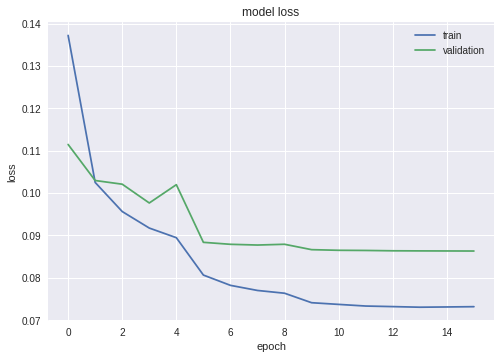

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Now, Predictions for the Test data to be uploaded in kaggle to generate the score

In [0]:
def predict(model, preprocessor, batch_size=128):
    """
    Launch the predictions on the test dataset as well as the additional test dataset
    :return:
        predictions_labels: list
            An array containing 17 length long arrays
        filenames: list
            File names associated to each prediction
    """
    generator = preprocessor.get_prediction_generator(batch_size)
    predictions_labels = model.predict_generator(generator=generator, verbose=1,
                                                 steps=len(preprocessor.X_test_filename) / batch_size)
    assert len(predictions_labels) == len(preprocessor.X_test), \
        "len(predictions_labels) = {}, len(preprocessor.X_test) = {}".format(
            len(predictions_labels), len(preprocessor.X_test))
    return predictions_labels, np.array(preprocessor.X_test)

In [28]:
predictions, x_test_filename = predict(model, preprocessor, batch_size=128)
print("Predictions shape: {}\nFiles name shape: {}\n1st predictions ({}) entry:\n{}".format(predictions.shape, 
                                                                              x_test_filename.shape,
                                                                              x_test_filename[0], predictions[0]))

479/478 [==============================] - 208s 434ms/step
Predictions shape: (61191, 17)
Files name shape: (61191,)
1st predictions (test_5393) entry:
[1.0055215e-01 2.7869365e-04 6.8155546e-03 3.5368542e-03 1.6997822e-02
 9.9514824e-01 2.9327895e-05 1.3519489e-04 3.0987388e-02 4.3289796e-03
 7.5368781e-04 2.3193760e-03 9.9989152e-01 8.2457978e-03 1.1364976e-03
 1.4594849e-03 2.1418018e-02]


In [0]:
thresholds = [0.2] * len(labels_set)

In [0]:
def map_predictions(preprocessor, predictions, thresholds):
    """
    Return the predictions mapped to their labels
    :param predictions: the predictions from the predict() method
    :param thresholds: The threshold of each class to be considered as existing or not existing
    :return: the predictions list mapped to their labels
    """
    predictions_labels = []
    for prediction in predictions:
        labels = [preprocessor.y_map[i] for i, value in enumerate(prediction) if value > thresholds[i]]
        predictions_labels.append(labels)

    return predictions_labels

In [0]:
predicted_labels = map_predictions(preprocessor, predictions, thresholds)

In [0]:
tags_list = [None] * len(predicted_labels)
for i, tags in enumerate(predicted_labels):
    tags_list[i] = ' '.join(map(str, tags))

final_data = [[filename.split(".")[0], tags] for filename, tags in zip(x_test_filename, tags_list)]

In [42]:
final_df = pd.DataFrame(final_data, columns=['image_name', 'tags'])
print("Predictions rows:", final_df.size)
final_df.head()

Predictions rows: 122382


image_name                   tags
0   test_5393          clear primary
1   test_8745          clear primary
2  test_33259  partly_cloudy primary
3  test_17126          clear primary
4  test_16892          clear primary

In [0]:
final_df.to_csv('submission_file.csv', index=False)

In [47]:
saveAndUpload('submission_file.csv')

Uploaded file with https://drive.google.com/open?id=1HTdPsvbNl-LXnmi2MDkYzk7NKSWDNy-o


#VGG16

In [0]:
img_dim=(128, 128, 3)
input_tensor = Input(shape=img_dim)
base_model = VGG16(include_top=False,
                       weights='imagenet',
                       input_shape=img_dim)
    
bn = BatchNormalization()(input_tensor)
x = base_model(bn)
x = Flatten()(x)
output = Dense(17, activation='sigmoid')(x)
model = Model(input_tensor, output)

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
batch_normalization_191 (Bat (None, 128, 128, 3)       12        
_________________________________________________________________
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 17)                139281    
Total params: 14,853,981
Trainable params: 14,853,975
Non-trainable params: 6
_________________________________________________________________


In [52]:
history = History()
callbacks = [history, 
             EarlyStopping(monitor='val_loss', patience=3, verbose=1, min_delta=1e-4),
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, cooldown=0, min_lr=1e-7, verbose=1),
             ModelCheckpoint(filepath='weightsvgg16.best.hdf5', verbose=1, save_best_only=True, 
                             save_weights_only=True, mode='auto')]

X_train, y_train = preprocessor.X_train, preprocessor.y_train
X_val, y_val = preprocessor.X_val, preprocessor.y_val

batch_size = 128
train_generator = preprocessor.get_train_generator(batch_size)
steps = len(X_train) / batch_size

model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit_generator(train_generator, steps, epochs=25, verbose=1, 
                    validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/25
253/252 [==============================] - 289s 1s/step - loss: 0.1311 - acc: 0.9494 - val_loss: 0.1136 - val_acc: 0.9572

Epoch 00001: val_loss improved from inf to 0.11362, saving model to weightsvgg16.best.hdf5
Epoch 2/25
253/252 [==============================] - 286s 1s/step - loss: 0.1002 - acc: 0.9617 - val_loss: 0.1009 - val_acc: 0.9613

Epoch 00002: val_loss improved from 0.11362 to 0.10088, saving model to weightsvgg16.best.hdf5
Epoch 3/25
253/252 [==============================] - 286s 1s/step - loss: 0.0930 - acc: 0.9645 - val_loss: 0.0984 - val_acc: 0.9623

Epoch 00003: val_loss improved from 0.10088 to 0.09844, saving model to weightsvgg16.best.hdf5
Epoch 4/25
253/252 [==============================] - 286s 1s/step - loss: 0.0896 - acc: 0.9656 - val_loss: 0.0948 - val_acc: 0.9635

Epoch 00004: val_loss improved from 0.09844 to 0.09479, saving model to weightsvgg16.best.hdf5
Epoch 5/25
253/252 [==============================] - 286s 1s/step - loss: 0.0865 - acc:

In [53]:
saveAndUpload('weightsvgg16.best.hdf5')

Uploaded file with https://drive.google.com/open?id=1YfkIxOpa7re5Hdn7KBsYrD0UB0_7aitr


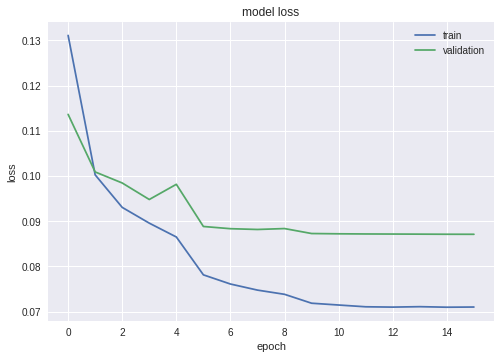

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [69]:


model.load_weights("weightsvgg16.best.hdf5")
print("Weights loaded")



Weights loaded


In [70]:
predictions, x_test_filename = predict(model, preprocessor, batch_size=128)
print("Predictions shape: {}\nFiles name shape: {}\n1st predictions ({}) entry:\n{}".format(predictions.shape, 
                                                                              x_test_filename.shape,
                                                                              x_test_filename[0], predictions[0]))

479/478 [==============================] - 181s 378ms/step
Predictions shape: (61191, 17)
Files name shape: (61191,)
1st predictions (test_5393) entry:
[1.0072736e-02 3.8661034e-05 2.9215976e-04 1.9717605e-03 1.8340651e-03
 9.9568486e-01 6.4001497e-06 1.3282579e-05 2.3939700e-03 1.9543765e-03
 5.7566562e-04 2.4839053e-03 9.9995470e-01 2.4839432e-03 7.9943775e-04
 9.1922426e-05 1.1173895e-02]


In [0]:
thresholds = [0.2] * len(labels_set)

In [72]:
thresholds

[0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2]

In [17]:
predictions, x_test_filename = predict(model, preprocessor, batch_size=128)
print("Predictions shape: {}\nFiles name shape: {}\n1st predictions ({}) entry:\n{}".format(predictions.shape, 
                                                                              x_test_filename.shape,
                                                                              x_test_filename[0], predictions[0]))

479/478 [==============================] - 172s 360ms/step
Predictions shape: (61191, 17)
Files name shape: (61191,)
1st predictions (test_5393) entry:
[9.3064914e-03 4.4568237e-06 6.6629422e-05 1.3381154e-04 2.6653431e-04
 9.9383485e-01 3.3984397e-06 4.1185272e-10 4.7000963e-03 1.1143025e-04
 1.0860726e-03 1.3305301e-02 9.9998105e-01 2.6450029e-03 1.1096202e-04
 1.9215362e-05 1.3491039e-02]


In [0]:
predicted_labels = map_predictions(preprocessor, predictions, thresholds)

In [0]:
tags_list = [None] * len(predicted_labels)
for i, tags in enumerate(predicted_labels):
    tags_list[i] = ' '.join(map(str, tags))

final_data = [[filename.split(".")[0], tags] for filename, tags in zip(x_test_filename, tags_list)]

In [0]:
final_df = pd.DataFrame(final_data, columns=['image_name', 'tags'])
print("Predictions rows:", final_df.size)
final_df.head()

In [0]:
final_df.to_csv('submission50_file.csv', index=False)

In [0]:
saveAndUpload('submission50_file.csv')

In [61]:
# saveAndUpload('submission16_file.csv')

Uploaded file with https://drive.google.com/open?id=10FVKU1tUCAHTTwEsWer03HcUKB4GG89w


## **Inception v3**


---
### It was taking lot of time and resources to run. Tried multiple times but the GPU would run out of memory in google colab


In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer
predictions = Dense(17, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers 
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model 
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

history = History()
callbacks = [history, 
             EarlyStopping(monitor='val_loss', patience=3, verbose=1, min_delta=1e-4),
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, cooldown=0, min_lr=1e-7, verbose=1),
             ModelCheckpoint(filepath='inceptionv3.best.hdf5', verbose=1, save_best_only=True, 
                             save_weights_only=True, mode='auto')]

X_train, y_train = preprocessor.X_train, preprocessor.y_train
X_val, y_val = preprocessor.X_val, preprocessor.y_val

batch_size = 128
train_generator = preprocessor.get_train_generator(batch_size)
steps = len(X_train) / batch_size
# train the model on the new data for a few epochs
model.fit_generator(train_generator, steps, epochs=10, verbose=1, 
                    validation_data=(X_val, y_val), callbacks=callbacks)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit_generator(train_generator, steps, epochs=25, verbose=1, 
                    validation_data=(X_val, y_val), callbacks=callbacks)

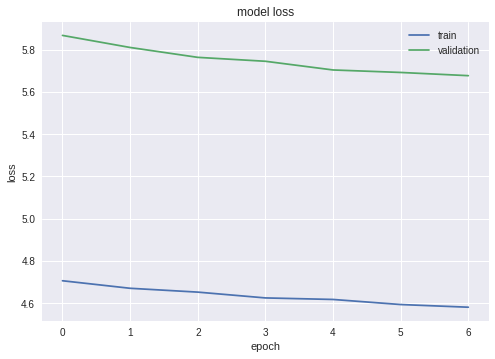

In [64]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [0]:
thres = {   'blow_down':0.2,
                'bare_ground':0.138,
                'conventional_mine':0.1,
                'blooming':0.168,
                'cultivation':0.204,
                'artisinal_mine':0.114,
                'haze':0.204,
                'primary':0.204,
                'slash_burn':0.38,
                'habitation':0.17,
                'clear':0.13,
                'road':0.156,
                'selective_logging':0.154,
                'partly_cloudy':0.112,
                'agriculture':0.164,
                'water':0.182,
                'cloudy':0.076}

In [73]:
thres

{'agriculture': 0.164,
 'artisinal_mine': 0.114,
 'bare_ground': 0.138,
 'blooming': 0.168,
 'blow_down': 0.2,
 'clear': 0.13,
 'cloudy': 0.076,
 'conventional_mine': 0.1,
 'cultivation': 0.204,
 'habitation': 0.17,
 'haze': 0.204,
 'partly_cloudy': 0.112,
 'primary': 0.204,
 'road': 0.156,
 'selective_logging': 0.154,
 'slash_burn': 0.38,
 'water': 0.182}

In [0]:
th = [0.164,0.114,0.138,0.168,0.2,0.13,0.076,0.1,0.204,0.17,0.204,0.112, 0.204,0.156,0.154,0.38,0.182]

In [0]:
{0: 'agriculture',
 1: 'artisinal_mine',
 2: 'bare_ground',
 3: 'blooming',
 4: 'blow_down',
 5: 'clear',
 6: 'cloudy',
 7: 'conventional_mine',
 8: 'cultivation',
 9: 'habitation',
 10: 'haze',
 11: 'partly_cloudy',
 12: 'primary',
 13: 'road',
 14: 'selective_logging',
 15: 'slash_burn',
 16: 'water'}

In [80]:
a = [1,2,3,4,5]
b = [6,7,8,9,10]
for i,j,k in zip(a,b,a):
  if i < j:
    print (i,k)

1 1
2 2
3 3
4 4
5 5


In [0]:
def map_predictions(preprocessor, predictions, thresholds):
    """
    Return the predictions mapped to their labels
    :param predictions: the predictions from the predict() method
    :param thresholds: The threshold of each class to be considered as existing or not existing
    :return: the predictions list mapped to their labels
    """
    predictions_labels = []
    index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
    for prediction in predictions:
#         labels = [preprocessor.y_map[i] for i, value in enumerate(prediction) if value > thresholds[i]]
#         predictions_labels.append(labels)
        labels = []
        for i,p,v in zip(index,prediction,thresholds):
          if p >= v:
            labels.append(preprocessor.y_map[i])
        predictions_labels.append(labels)

    return predictions_labels

In [0]:
predicted_labels = map_predictions(preprocessor, predictions, th)

In [0]:
tags_list = [None] * len(predicted_labels)
for i, tags in enumerate(predicted_labels):
    tags_list[i] = ' '.join(map(str, tags))

final_data = [[filename.split(".")[0], tags] for filename, tags in zip(x_test_filename, tags_list)]

In [25]:
import pandas as pd
final_df = pd.DataFrame(final_data, columns=['image_name', 'tags'])
print("Predictions rows:", final_df.size)
final_df.head()

Predictions rows: 122382


image_name                       tags
0   test_5393              clear primary
1   test_8745              clear primary
2  test_33259      partly_cloudy primary
3  test_17126              clear primary
4  test_16892  agriculture clear primary

In [26]:
final_df.to_csv('submission50_file.csv', index=False)
saveAndUpload('submission50_file.csv')

Uploaded file with https://drive.google.com/open?id=18xokZut8DaI7Xznle0Gwr8qfLSiLh6Kv


In [0]:
final_df.to_csv('submission16_1_file.csv', index=False)

In [88]:
saveAndUpload('submission16_1_file.csv')

Uploaded file with https://drive.google.com/open?id=1jzuI2ghLkr-HdB2l-mSILEiaUu0Afqbi


# Resnet50

In [9]:
img_dim=(128, 128, 3)
input_tensor = Input(shape=img_dim)
model = ResNet50(include_top=False,weights='imagenet',input_shape=img_dim)

# resnet50_model = model
# # Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
# for layer in model.layers[:45]:
#     layer.trainable = False
    
    
    
bn = BatchNormalization()(input_tensor)
x = model(bn)
x = Flatten()(x)
output = Dense(17, activation='sigmoid')(x)
model = Model(input_tensor, output)
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
resnet50 (Model)             (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 17)                557073    
Total params: 24,144,797
Trainable params: 24,091,671
Non-trainable params: 53,126
_________________________________________________________________


In [12]:
history = History()
callbacks = [history, 
             EarlyStopping(monitor='val_loss', patience=3, verbose=1, min_delta=1e-4),
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, cooldown=0, min_lr=1e-7, verbose=1),
             ModelCheckpoint(filepath='weightsresnet50.best.hdf5', verbose=1, save_best_only=True, 
                             save_weights_only=True, mode='auto')]

X_train, y_train = preprocessor.X_train, preprocessor.y_train
X_val, y_val = preprocessor.X_val, preprocessor.y_val

batch_size = 64
train_generator = preprocessor.get_train_generator(batch_size)
steps = len(X_train) / batch_size

model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit_generator(train_generator, steps, epochs=25, verbose=1, 
                    validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/25
506/505 [==============================] - 375s 741ms/step - loss: 0.1098 - acc: 0.9589 - val_loss: 0.1013 - val_acc: 0.9611

Epoch 00001: val_loss improved from inf to 0.10129, saving model to weightsresnet50.best.hdf5
Epoch 2/25
506/505 [==============================] - 358s 707ms/step - loss: 0.0896 - acc: 0.9660 - val_loss: 0.1050 - val_acc: 0.9598

Epoch 00002: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 00002: val_loss did not improve from 0.10129
Epoch 3/25
506/505 [==============================] - 359s 709ms/step - loss: 0.0728 - acc: 0.9724 - val_loss: 0.0923 - val_acc: 0.9646

Epoch 00003: val_loss improved from 0.10129 to 0.09230, saving model to weightsresnet50.best.hdf5
Epoch 4/25
506/505 [==============================] - 358s 708ms/step - loss: 0.0667 - acc: 0.9746 - val_loss: 0.0929 - val_acc: 0.9648

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.

Epoch 00004: val_loss did not improve from 0.09

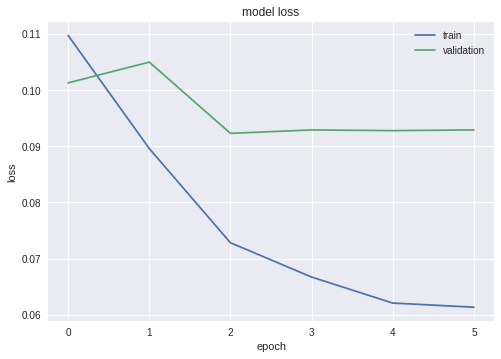

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [14]:
saveAndUpload('weightsresnet50.best.hdf5')

Uploaded file with https://drive.google.com/open?id=1bKUst7MzJiGeV5mrGsegVRQGfwQgI-Cl


#**InceptionResNetV2**

In [0]:
img_dim=(128, 128, 3)
input_tensor = Input(shape=img_dim)
model = keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False,weights='imagenet',input_shape=img_dim)

# resnet50_model = model
# # Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
# for layer in model.layers[:45]:
#     layer.trainable = False
    
    
    
bn = BatchNormalization()(input_tensor)
x = model(bn)
x = Flatten()(x)
output = Dense(17, activation='sigmoid')(x)
model = Model(input_tensor, output)
model.summary()

In [29]:
history = History()
callbacks = [history, 
             EarlyStopping(monitor='val_loss', patience=3, verbose=1, min_delta=1e-4),
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, cooldown=0, min_lr=1e-7, verbose=1),
             ModelCheckpoint(filepath='weightsInceptionResNetV2.best.hdf5', verbose=1, save_best_only=True, 
                             save_weights_only=True, mode='auto')]

X_train, y_train = preprocessor.X_train, preprocessor.y_train
X_val, y_val = preprocessor.X_val, preprocessor.y_val

batch_size = 32
train_generator = preprocessor.get_train_generator(batch_size)
steps = len(X_train) / batch_size

model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit_generator(train_generator, steps, epochs=25, verbose=1, 
                    validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/25
1012/1011 [==============================] - 914s 904ms/step - loss: 0.1339 - acc: 0.9492 - val_loss: 0.1368 - val_acc: 0.9585

Epoch 00001: val_loss improved from inf to 0.13685, saving model to weightsInceptionResNetV2.best.hdf5
Epoch 2/25
1012/1011 [==============================] - 838s 828ms/step - loss: 0.1000 - acc: 0.9618 - val_loss: 0.1286 - val_acc: 0.9593

Epoch 00002: val_loss improved from 0.13685 to 0.12859, saving model to weightsInceptionResNetV2.best.hdf5
Epoch 3/25
1012/1011 [==============================] - 843s 833ms/step - loss: 0.0893 - acc: 0.9658 - val_loss: 0.1020 - val_acc: 0.9617

Epoch 00003: val_loss improved from 0.12859 to 0.10202, saving model to weightsInceptionResNetV2.best.hdf5
Epoch 4/25
1012/1011 [==============================] - 848s 837ms/step - loss: 0.0835 - acc: 0.9682 - val_loss: 0.1163 - val_acc: 0.9599

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 00004: val_loss did not improve from 0.1

In [30]:
saveAndUpload('weightsInceptionResNetV2.best.hdf5')

Uploaded file with https://drive.google.com/open?id=1GgL1nWzs_8NFLpAwaT_UYM4ZRWP9_Pu7


In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [0]:
model.load_weights("weightsvgg16.best.hdf5")

In [0]:
predictions, x_test_filename = predict(model, preprocessor, batch_size=128)
print("Predictions shape: {}\nFiles name shape: {}\n1st predictions ({}) entry:\n{}".format(predictions.shape, 
                                                                              x_test_filename.shape,
                                                                              x_test_filename[0], predictions[0]))

In [0]:
predicted_labels = map_predictions(preprocessor, predictions, th)

In [0]:
tags_list = [None] * len(predicted_labels)
for i, tags in enumerate(predicted_labels):
    tags_list[i] = ' '.join(map(str, tags))

final_data = [[filename.split(".")[0], tags] for filename, tags in zip(x_test_filename, tags_list)]

In [0]:
import pandas as pd
final_df = pd.DataFrame(final_data, columns=['image_name', 'tags'])
print("Predictions rows:", final_df.size)
final_df.head()

In [0]:
final_df.to_csv('submissionresv3_file.csv', index=False)
saveAndUpload('submissionresv3_file.csv')